In [4]:
#A cell to import all needed modules 
#for the following functions
from PIL import Image, ImageDraw
from random import randint
import numpy as np
import pandas as pd

## Random pixel image generator, counter function and examples 

These are non-integrated examples of how to use them if one would like to use these to generate images outside of the scope of what has already been done.  

In [10]:
def image_generator(n):
    """Generates a number of images with randomized white pixels on a black background"""
    i=0
    j=0
    k=0
    imgarray = [] #sets up the output array
    for i in range(0, n): #begins the counter on number of images based on the input
        img = Image.new('L', [250, 250]) #creates a 250x250 pixel image
        draw = ImageDraw.Draw(img)
        np.random.seed(123+i) #creates reproducibility in randomness that changes with each iteration
        for j in range(0,img.size[0]):#Creates random starting points for pixels
            for k in range(0, img.size[0]):
                a = randint(0,50)+(3*j)
                b = randint(0,50)+(3*k)
                c = a+1
                d = b+1
                draw.ellipse([a,b,c,d], fill=255)
                k=k+randint(90,100) #creates random jumps in the counter
            j = j+randint(90,100)
        array = np.array(img)#saves the image as a numpy array
        imgarray.append(array)#adds new array to the list of arrays
        print(type(imgarray))
        print(imgarray)
    return imgarray

In [11]:
def pixel_counter_single_image(array, array_index):
    """Counts the number of colored pixels for a single image"""    
    black = 0 #sets the counter to 0
    obj = 0 #sets the counter to 0
    img = Image.fromarray(array[array_index]) #Takes an array and creates an image
    for pixel in img.getdata(): #cycles through the pixels in each image
        if pixel == 0:
            black += 1
        else:
            obj += 1
    print('object=' + str(obj) + ', black=' +str(black))
    return

In [14]:
def pixel_counter_whole_array(array):
    """Counts the number of pixels for """
    i = 0
    pixel_count = pd.DataFrame(columns=['Index','Object', 
                                        'Black', 'Total'])#Creates dataframe for storing count data
    for i in range(0,len(array)): #counts through the 'images' in the given array
        img = Image.fromarray(array[i])
        black = 0
        obj = 0
        for pixel in img.getdata(): #counts pixels in each image
            if pixel == 0:
                black += 1
            else:
                obj += 1
        total = black + obj #sums up the number of pixels counted. Images are 250x250
        pixel_count.loc[i] = [i, obj, black, total]
    print(type(pixel_count))
    return pixel_count

Below are the examples for the three functions above: image_generator, pixel_counter_single_image, and pixel_counter_whole_array.

The image_generator function takes the number of images needed as an input and outputs an array of numpy arrays. To silence the output when inputting large numbers to the function set it equal to a variable which can then be used to view the images created.  

In [15]:
test_array = image_generator(2) #generates 2 images with randomized pixel coloring and saves them as a np. array

<class 'list'>
[array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 255,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0, 255,   0]], dtype=uint8)]
<class 'list'>
[array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 255,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0, 255,   0]], dtype=uint8), array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0, 255],
       [  0,   0,   0, ...,   0, 255,   0],
       [  0,   0,   0, ...,   0,   0, 255]], dtype=uint8)]


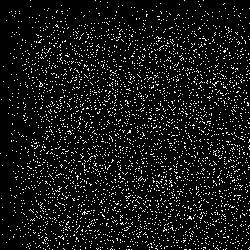

In [16]:
img = Image.fromarray(test_array[1]) #converts the np array saved in the function above to an image for viewing. 
img

To count the number of pixels the pixel_counter_single_image or pixel_counter_whole_array can be used.  For large numbers of n in the image generator functions it is probably more applicable to run the pixel_counter_whole_array function as it outputs the number of objects in a dataframe which can be parsed through.  For each function the image in array format must be input with the index number for the single_image function.  Examples follow below from the random image generator run above.

In [17]:
pixel_counter_single_image(test_array, 1) #test_array named above as the input and image 2 (index 1) as the other input. 
#outputs a printout of how many non-black objects are present and how many background (black) pixels are present.

object=5333, black=57167


In [18]:
pixel_counter_whole_array(test_array)#test_array named above as the input. 
#outputs a datafram of how many non-black objects are present and how many background (black) pixels are present as well as
#the total number of pixels counted.  For a 250x250 image or numpy array there would be 62500 pixels counted.  

<class 'pandas.core.frame.DataFrame'>


,Index,Object,Black,Total
0,0,5390,57110,62500
1,1,5333,57167,62500


## Image generator with patterned circles, counter function and examples

In [9]:
def image_generator_circles(n):
    """Generates a number of images with randomized white circles on a black background"""
    np.random.seed(125) #creates the ability for the randomness to be reproducible
    i=0
    j=2
    k=2
    imgarray = []
    for i in range(0, n):
        img = Image.new('L', [250, 250]) #creates a 250x250 pixel image
        draw = ImageDraw.Draw(img) 
        y = randint(9,50)
        z = randint(9,50)
        for k in range (2, 240, y):
            for j in range (2, 240, z): 
                a = j
                b = k
                c = j+8
                d = k+8
                draw.ellipse([a,b,c,d], fill=255)       
        array = np.array(img)#saves the image as a numpy array
        imgarray.append(array)#adds a callable feature for arrays
    return imgarray

In [27]:
def pixel_counter_single_image_circles(array, array_index):
    """Counts the number of pixels for individual circle images"""
    black = 0
    obj = 0
    img = Image.fromarray(array[array_index])#transforms np array into image in order to count pixels
    for pixel in img.getdata(): #iterates through pixels within in the image
        if pixel == 0:
            black += 1
        else:
            obj += 1
    obj_normalized = obj/(69) #each full circle has 69 pixels in it.
    print('object=' + str(obj_normalized) + ', black=' +str(black))
    return

In [28]:
def pixel_counter_whole_array_circles(array):
    """Counts the number of pixels for the array of circle images"""
    i = 0
    pixel_count = pd.DataFrame(columns=['Index','Object', 
                                        'Black', 'Total'])#Creates dataframe for storing count data
    for i in range(0,len(array)): #counts through the 'images' in the given array
        img = Image.fromarray(array[i])
        black = 0
        obj = 0
        for pixel in img.getdata(): #counts pixels in each image
            if pixel == 0:
                black += 1
            else:
                obj += 1
        obj_normalized = obj/(69)
        total = black + obj #sums up the number of pixels counted. Images are 250x250 so 62500 pixels should be counted.
        pixel_count.loc[i] = [i, obj_normalized, black, total] #updates the dataframe with the counts
    return pixel_count

Below are the examples for the three functions above: image_generator_circles, pixel_counter_single_image_circles, and pixel_counter_whole_array_circles.

The image_generator_circles function takes the number of images needed as an input and outputs an array of numpy arrays. To silence the output when inputting large numbers to the function set it equal to a variable which can then be used to view the images created.

In [29]:
test = image_generator_circles(3) #Input of 3 generates 3 images from this function and outputs an 
#array holding the np arrays of the images. Names the function tests as a callable attribute.

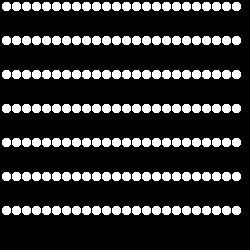

In [30]:
img = Image.fromarray(test[0]) #Converts the np array from the 'test' variable into an image and names it a callable 
#variable 'img'.  
img

To count the number of pixels the pixel_counter_single_image_circles or pixel_counter_whole_array_circles can be used.  For large numbers of n in the image generator functions it is probably more applicable to run the pixel_counter_whole_array_circles function as it outputs the number of objects in a dataframe which can be parsed through.  For each function the image in array format must be input with the index number for the single_image function.  Examples follow below from the random image generator run above.

In [31]:
pixel_counter_single_image_circles(test, 0) #Uses the test varaible of arrays and the index of 0 to count the background
#pixels and objects in the image.  Outputs the print string of these values.

object=168.0, black=50908


In [32]:
pixel_counter_whole_array_circles(test) #Uses the array generated from the circles image generator as an input and counts 
#the number of objects within the image. Outputs a dataframe. 

,Index,Object,Black,Total
0,0.0,168.0,50908.0,62500.0
1,1.0,49.0,59119.0,62500.0
2,2.0,104.0,55324.0,62500.0


## Image generator of rectangles with object counters and examples

In [16]:
def image_generator_rectangles(n):
    """Generates a number of images with randomized white rectangles on a black background"""
    np.random.seed(126) #Seeds the randomness for reproducibilitiy
    i=0
    j=2
    k=2
    imgarray = []
    for i in range(0, n):
        img = Image.new('L', [250, 250]) #creates a 250x250 pixel image
        draw = ImageDraw.Draw(img) 
        y = randint(9,50) #creates random jumps for the counter to have different patterns per image
        z = randint(9,50)
        for k in range (2, 240, y):
            for j in range (2, 240, z):
                a = j
                b = k
                c = j+4
                d = k+4
                draw.rectangle([a,b,c,d], fill=255)       
        array = np.array(img)#saves the image as a numpy array
        imgarray.append(array)#adds a callable feature for arrays
    return imgarray

In [17]:
def pixel_counter_single_image_rectangles(array, array_index):
    """Counts the number of pixels for individual rectangle images"""
    black = 0
    obj = 0
    img = Image.fromarray(array[array_index]) #converts image from array into an image
    for pixel in img.getdata(): #cycles through each pixel in the image
        if pixel == 0:
            black += 1
        else:
            obj += 1
    obj_normalized = obj/(25) #normalizes the number of pixels per square
    print('object=' + str(obj_normalized) + ', black=' +str(black))
    return

In [18]:
def pixel_counter_whole_array_rectangles(array):
    """Counts the number of pixels for the array of rectangle images"""
    i = 0
    pixel_count = pd.DataFrame(columns=['Index','Object','Black', 'Total'])#Creates dataframe for storing count data
    for i in range(0,len(array)): #counts through the 'images' in the given array
        img = Image.fromarray(array[i])
        black = 0
        obj = 0
        for pixel in img.getdata(): #counts pixels in each image
            if pixel == 0:
                black += 1
            else:
                obj += 1
        obj_normalized = obj/(25)#normalizes the number of pixels per square
        total = black + obj #sums up the number of pixels counted. Images are 250x250 so 62500 pixels should be counted.
        pixel_count.loc[i] = [i, obj_normalized, black, total] #updates the dataframe with the counts
    return pixel_count

Below are the examples for the three functions above: image_generator_rectangles, pixel_counter_single_image_rectangles, and pixel_counter_whole_array_rectangles.

In [19]:
test_rectangles = image_generator_rectangles(3) #Will produce 3 images based on the numeric input.
#test_rectangles variable named so that the function output can be called in future processes.

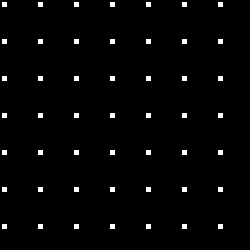

In [20]:
img = Image.fromarray(test_rectangles[0]) #Converts one np array from the generator into an image for viewing.
img

To count the number of pixels the pixel_counter_single_image_rectangles or pixel_counter_whole_array_rectangles can be used.  For large numbers of n in the image generator functions it is probably more applicable to run the pixel_counter_whole_array_rectangles function as it outputs the number of objects in a dataframe which can be parsed through.  For each function the image in array format must be input with the index number for the single_image_rectactangles function.  Examples follow below from the random image generator run above.

In [21]:
pixel_counter_single_image_rectangles(test_rectangles, 0) #Using the test_rectangles array and a specific index the output
#will be the number of objects present in the image.

object=49.0, black=61275


In [22]:
pixel_counter_whole_array_rectangles(test_rectangles) #Using the test_rectangles array the ouput will be the number of 
#objects present in the image.

,Index,Object,Black,Total
0,0.0,49.0,61275.0,62500.0
1,1.0,30.0,61750.0,62500.0
2,2.0,45.0,61375.0,62500.0


## Image generator of rectangles and circles with examples

In [23]:
def image_generator_circles_and_rectangles(n):
    np.random.seed(127)
    i=0
    j=2
    k=2
    imgarray = []
    for i in range(0, n):
        img = Image.new('L', [250, 250]) #creates a 250x250 pixel image
        draw = ImageDraw.Draw(img) 
        w = randint(20,50) #creates random line assignments for circles and rectangles
        x = randint(20,50)
        y = randint(9,40)
        z = randint(9,40)
        for k in range (2, 240, w):
            for j in range (2, 240, x): 
                a = j
                b = k
                c = j+8
                d = k+8
                draw.ellipse([a,b,c,d], fill=255)
        for m in range (2, 240, y):
            for n in range (2, 240, z):
                e = m
                f = n
                g = m+4
                h = n+4
                draw.rectangle([e,f,g,h], fill=255)
        array = np.array(img)#saves the image as a numpy array
        imgarray.append(array)#adds a callable feature for arrays
    
    return imgarray

The image_generator_circles_and_rectangles function takes the number of images needed as an input and outputs an array of numpy arrays. To silence the output when inputting large numbers to the function set it equal to a variable which can then be used to view the images created.

In [24]:
test_circles_and_rectangles = image_generator_circles_and_rectangles(2) #Using the number of images wanted as an input (2) an array of 
#image arrays will be the output.

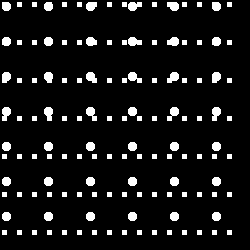

In [25]:
img = Image.fromarray(test_circles_and_rectangles[0]) #converting the output array to a visual image.
img